# Data Exploration

## Library imports

In [4]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import importlib 
import subprocess
import sys

from pathlib import Path 

In [5]:
# import other libraries 
# check if jcds library is installed
package_name = "jcds"

if importlib.util.find_spec(package_name) is None:
    print(f" '{package_name}' not found. Installing from Github... ")
    subprocess.check_call(
        [
            sys.executable,
            "-m",
            "pip",
            "install",
            "git+https://github.com/junclemente/jcds.git",
        ]
    )
else:
    print(f" '{package_name}' is already installed.")

from jcds import eda as jeda
from jcds import reports as jrep

 'jcds' is already installed.


## Import dataset

In [6]:
data_folder = Path("../data")

df = pd.read_pickle(data_folder / "ews_dataset.pkl")

# id_columns = ['cdscode', 'latitude', 'longitude', 'county']

# df = df.drop(columns=id_columns)

df.head()

,cdscode,county,virtual,magnet,yearroundyn,latitude,longitude,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,1611190130229,Alameda,N,N,N,37.764958,-122.24593,N,394.0,92.4,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,1611270130450,Alameda,N,N,N,37.896661,-122.29257,N,284.0,95.1,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,1611430131177,Alameda,N,N,N,37.868913,-122.27120,Y,861.0,90.5,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,1611500132225,Alameda,N,N,N,37.705184,-122.07847,N,672.0,96.4,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,1611500133876,Alameda,V,N,N,37.713501,-122.09222,N,31.0,100.0,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


## Basic info


In [7]:
jrep.data_info(df, show_columns=True)


SHAPE:
There are 1067 rows and 46 columns (0.64 MB).

DUPLICATES:
There are 0 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 5
 * int: 1
 * float: 40
There are 41 numerical (int/float/bool) variables.
 * Columns: ['cdscode', 'latitude', 'longitude', 'cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'a

## Cardinality

In [8]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 46

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['yearroundyn']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 3 constant columns.
 * Columns: ['high_conn', 'low_conn', 'conn_ratio']
There are 4 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn', 'high_conn', 'low_conn', 'conn_ratio']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 4 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


## Data Quality

In [9]:
jrep.data_quality(df, show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 49082
 * Memory usage: 0.64 MB
 * Rows: 1067
 * Columns: 46

MISSING DATA:
 * Total entries: 3179 missing (6.5%)

ROWS:
----------
 * Rows missing any: 331
 * Rows missing all: 0

DUPLICATES: 0

COLUMNS:
----------------
Columns missing any: 35
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'stu_psv_ratio': 164 missing (15.4%)
	'stu_adm_ratio': 157 missing (14.7%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
	'stu_tch_ratio': 97 missing (9.1%)
	'pct_associate': 96 missing (9.0%)
	'pct_bachelors': 96 missing (9.0%)
	'pct_bachelors_plus': 96 missing (9.0%)
	'pct_master': 96 missing (9.0%)
	'pct_master_plus': 96 missing (9.0%)
	'pct_doctorate': 96 missing (9.0%)
	'pct_juris_doctor': 96 missing (9.0%)
	'pct_no_degree': 96 missing (9.0%)
	'pct_experienced': 96 missing (9.0%)
	'pct_inexperienced': 96 missing (9.0%)
	'pct_first_

## Missing Data

### Heatmap of Missing Data

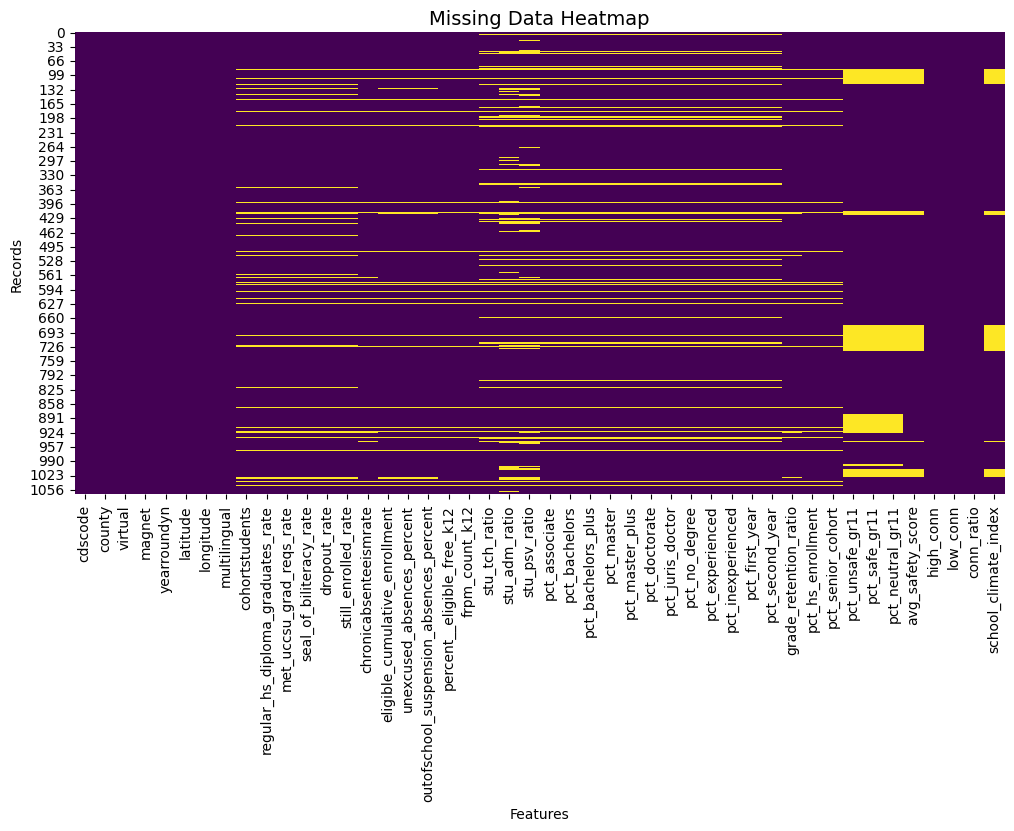

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), 
            cbar=False,
            cmap='viridis')

plt.title("Missing Data Heatmap", fontsize=14, )
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()

### Data Quality of Cols Missing Data

In [11]:
missing_cols = ['county', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'stu_psv_ratio', 'stu_adm_ratio', 'avg_safety_score', 'school_climate_index']
                
jrep.data_quality(df[missing_cols],show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 8536
 * Memory usage: 0.12 MB
 * Rows: 1067
 * Columns: 8

MISSING DATA:
 * Total entries: 1083 missing (12.7%)

ROWS:
----------
 * Rows missing any: 326
 * Rows missing all: 0

DUPLICATES: 103

COLUMNS:
----------------
Columns missing any: 7
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'stu_psv_ratio': 164 missing (15.4%)
	'stu_adm_ratio': 157 missing (14.7%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
Column list: ['pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'stu_psv_ratio', 'stu_adm_ratio', 'avg_safety_score', 'school_climate_index']

CONSTANT: 0

NEAR CONSTANT: 0
	(95% of values are the same)

MIXED DATATYPES: 0

HIGH CARDINALITY: 0
	(60% >= unique values)


### Table of Counties with Missing Data

In [12]:
# create df showing missing % per county per column
missingness_df = (
    df.groupby('county')[missing_cols]
      .apply(lambda g: g.isnull().mean() * 100)
      .round(2)
)

# Remove counties where all values are 0%
missingness_df = missingness_df.loc[(missingness_df != 0).any(axis=1)]

print("🧭 Missingness (% by County and Variable):")
display(missingness_df)

🧭 Missingness (% by County and Variable):


,county,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,stu_psv_ratio,stu_adm_ratio,avg_safety_score,school_climate_index
county,,,,,,,,
Alameda,0.0,0.0,0.0,0.0,21.88,15.62,0.0,0.0
Butte,0.0,0.0,0.0,0.0,22.22,11.11,0.0,0.0
Calaveras,0.0,0.0,0.0,0.0,100.00,50.00,0.0,0.0
Colusa,0.0,0.0,0.0,0.0,75.00,50.00,0.0,0.0
El Dorado,0.0,0.0,0.0,0.0,33.33,33.33,0.0,0.0
Fresno,0.0,100.0,100.0,100.0,5.56,5.56,100.0,100.0
Glenn,0.0,0.0,0.0,0.0,40.00,40.00,0.0,0.0
Humboldt,0.0,0.0,0.0,0.0,44.44,44.44,0.0,0.0
Imperial,0.0,0.0,0.0,0.0,22.22,33.33,0.0,0.0


In [13]:
# counties missing 100% safety data
missing_counties = (
    missingness_df
    .loc[missingness_df['pct_neutral_gr11'] == 100]
    .index
    .to_list()
)

print(f"Total counties missing safety by grade level data: \
      {len(missing_counties)}")
print("\nCounties completely missing safety data: ")
display(missing_counties)

Total counties missing safety by grade level data:       7

Counties completely missing safety data: 


['Fresno',
 'Madera',
 'San Bernardino',
 'Santa Clara',
 'Sierra',
 'Sutter',
 'Tulare']

### Percent of High School Enrollment

This column indicates if the row contains strictly high school data (value = 1). 

In [14]:
df['pct_hs_enrollment'].describe()

count    1028.000000
mean        0.983842
std         0.088032
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: pct_hs_enrollment, dtype: float64

In [15]:
df['pct_hs_enrollment'].value_counts(normalize=True).head()

pct_hs_enrollment
1.000000    0.949416
0.000000    0.001946
0.997890    0.000973
0.398810    0.000973
0.661258    0.000973
Name: proportion, dtype: float64

#### Observation

This information tells us how much of the data is related to high school data. Less than 100% means that some of the is a mixed population which could include grades K-8. 

About 95.6% of the data are strictly high school level data.
About 0.01% of the data shows data of 99.7% of the data is high school data. This may also be due to rounding errors. 
Anything less than 90% may be a mixed population or contain reporting errors. 
Therefore, all rows with <90% will be removed prior to EDA. 

In [16]:
# keep rows where value is >=0.9
df = df[df['pct_hs_enrollment'] >= 0.9]

# drop column as it is only used for quality check
df = df.drop(columns=['pct_hs_enrollment'])

### Rows with missing value in target variable

There are 76 rows that are missing value in the target variable. These rows will be removed prior to EDA. 

In [17]:
target = "regular_hs_diploma_graduates_rate"

df_missing_target = df[df[target].isna()]

df_missing_target.head()

,cdscode,county,virtual,magnet,yearroundyn,latitude,longitude,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,...,grade_retention_ratio,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
110,10739650140509,Fresno,N,N,N,36.795010,-119.91645,N,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.333333,0.333333,0.999997,NaN
112,10739651030790,Fresno,N,N,N,36.766323,-119.97188,N,NaN,NaN,...,1.434211,0.541985,NaN,NaN,NaN,NaN,0.333333,0.333333,0.999997,NaN
121,11626531132109,Glenn,N,N,N,39.627986,-122.59807,N,NaN,NaN,...,0.666667,0.523810,0.073,0.600,0.326,0.034607,0.333333,0.333333,0.999997,0.517303
129,12630400140376,Humboldt,C,N,N,40.241157,-123.62334,N,NaN,NaN,...,2.000000,0.375000,0.087,0.582,0.331,0.033480,0.333333,0.333333,0.999997,0.516740
132,12753821230085,Humboldt,C,N,N,40.321293,-124.27296,N,NaN,NaN,...,0.333333,0.444444,0.087,0.582,0.331,0.033480,0.333333,0.333333,0.999997,0.516740


In [18]:
# drop rows missing the target variable
df = df.dropna(subset=[target])
df

,cdscode,county,virtual,magnet,yearroundyn,latitude,longitude,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,...,grade_retention_ratio,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,1611190130229,Alameda,N,N,N,37.764958,-122.24593,N,394.0,92.4,...,1.058568,0.498894,0.080,0.568,0.351,0.034230,0.333333,0.333333,0.999997,0.517115
1,1611270130450,Alameda,N,N,N,37.896661,-122.29257,N,284.0,95.1,...,0.996721,0.501264,0.080,0.568,0.351,0.034230,0.333333,0.333333,0.999997,0.517115
2,1611430131177,Alameda,N,N,N,37.868913,-122.27120,Y,861.0,90.5,...,1.014907,0.496276,0.080,0.568,0.351,0.034230,0.333333,0.333333,0.999997,0.517115
3,1611500132225,Alameda,N,N,N,37.705184,-122.07847,N,672.0,96.4,...,0.829876,0.470174,0.080,0.568,0.351,0.034230,0.333333,0.333333,0.999997,0.517115
5,1611680132746,Alameda,N,N,N,37.835405,-122.28270,N,40.0,95.0,...,1.170732,0.545455,0.080,0.568,0.351,0.034230,0.333333,0.333333,0.999997,0.517115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,57727100101162,Yolo,N,N,N,38.657047,-121.74229,Y,327.0,96.0,...,0.896386,0.462795,0.059,0.599,0.342,0.034387,0.333333,0.333333,0.999997,0.517193
1063,57727105738802,Yolo,N,N,N,38.683705,-121.78395,N,277.0,96.0,...,0.964052,0.485669,0.059,0.599,0.342,0.034387,0.333333,0.333333,0.999997,0.517193
1064,58727365830013,Yuba,N,N,N,39.079263,-121.53070,N,226.0,87.2,...,0.707865,0.433469,0.140,0.457,0.402,0.032650,0.333333,0.333333,0.999997,0.516325
1065,58727365835202,Yuba,N,N,N,39.155225,-121.58565,N,201.0,90.5,...,0.623418,0.425781,0.140,0.457,0.402,0.032650,0.333333,0.333333,0.999997,0.516325


### Observations

Review of the columns with >10% missing values show that these features come from three datasets:
- Student - Staff Ratio
- Safety Perception by Grade
- Safety Perception by School Connectedness

Isolating just these columns, there are 1083 missing entries, or 12.7%. In this subset, we can see that there are 326 rows that are missing at least one value but none of the rows are missing all values. Overall, this could possibly suggest that there is a reporting gap and not a systemic issue where not all schools reported on the survey metrics. 

The top three columns (`pct_unsafe_gr11`, `pct_safe_gr11`, and `pct_neutral_gr11`) are each missing 16.1% of data in their columns. These variables are from the dataset on perception of safety based on grade level. There is another other column concerning safety: `avg_safety_score`. This is from another dataset focusing on safety based on connectedness. Since these are different ways of measuring the same data, we should consider dropping the data based on safety by grade level. 

There are seven counties that did not have any data for safety perception. Since these counties did not have any data for safety perception, this could possibly be a systemic reporting issue for the county. Since the lack of data represents data on certain populations, including safety as a feature may misrepresent these counties. Safety information may have to be removed when modeling that includes these counties. 

Based on these findings, missing values will be imputed using median imputation. Special consideration will be taken when including safety perception especially when including the seven counties that did not have any safety data.

In [19]:
# list features and target
target = "regular_hs_diploma_graduates_rate"

# create categorical feature of target variable
df["target_grad_category"] = np.where(
    df[target] >= 80, 
    'Graduated / On Track', 
    'Not Graduated / At Risk'
)

num_cols = df.select_dtypes(include='number').columns.to_list()

cat_cols = df.select_dtypes(exclude='number').columns.to_list()

# Univariate Analysis

## Numerical Features

In [20]:
df_num = df[num_cols].copy()

df_num.head()

,cdscode,latitude,longitude,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,...,grade_retention_ratio,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,1611190130229,37.764958,-122.24593,394.0,92.4,73.9,22.8,2.3,1.0,12.7,...,1.058568,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,1611270130450,37.896661,-122.29257,284.0,95.1,67.8,21.5,3.5,0.0,70.3,...,0.996721,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,1611430131177,37.868913,-122.27120,861.0,90.5,62.3,12.1,8.1,0.8,5.2,...,1.014907,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,1611500132225,37.705184,-122.07847,672.0,96.4,72.8,25.0,2.2,0.0,3.5,...,0.829876,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
5,1611680132746,37.835405,-122.28270,40.0,95.0,76.3,0.0,5.0,0.0,29.6,...,1.170732,0.545455,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


In [21]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cdscode,958.0,2.947061e+13,1.389729e+13,1.611190e+12,1.964733e+13,3.066670e+13,3.773569e+13,5.872770e+13
latitude,958.0,3.581028e+01,2.198026e+00,3.256644e+01,3.394705e+01,3.500323e+01,3.773999e+01,4.196415e+01
longitude,958.0,-1.195701e+02,2.026099e+00,-1.242614e+02,-1.215615e+02,-1.190629e+02,-1.179254e+02,-1.145989e+02
cohortstudents,958.0,3.713278e+02,1.956476e+02,1.100000e+01,2.192500e+02,3.815000e+02,5.047500e+02,1.044000e+03
regular_hs_diploma_graduates_rate,958.0,9.201451e+01,6.528421e+00,4.540000e+01,8.950000e+01,9.380000e+01,9.660000e+01,1.000000e+02
met_uccsu_grad_reqs_rate,958.0,5.264144e+01,1.841433e+01,0.000000e+00,4.082500e+01,5.310000e+01,6.520000e+01,1.000000e+02
seal_of_biliteracy_rate,958.0,1.517119e+01,1.237461e+01,0.000000e+00,5.725000e+00,1.370000e+01,2.230000e+01,6.830000e+01
dropout_rate,958.0,4.499791e+00,4.760792e+00,0.000000e+00,1.300000e+00,3.000000e+00,6.300000e+00,3.850000e+01
still_enrolled_rate,958.0,1.513674e+00,2.111686e+00,0.000000e+00,0.000000e+00,8.000000e-01,2.000000e+00,1.670000e+01
chronicabsenteeismrate,958.0,1.475470e+01,1.440405e+01,0.000000e+00,4.725000e+00,1.105000e+01,2.010000e+01,8.500000e+01


### Histogram and KDE Plots

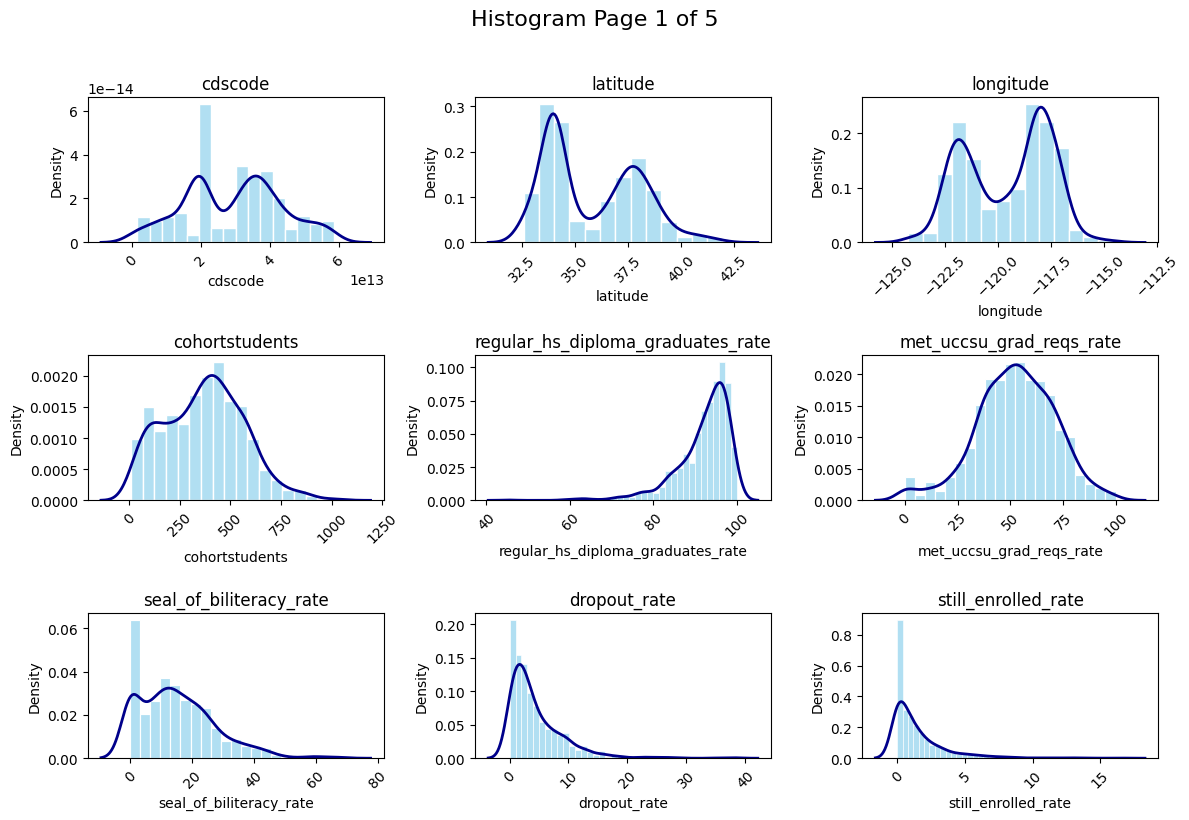

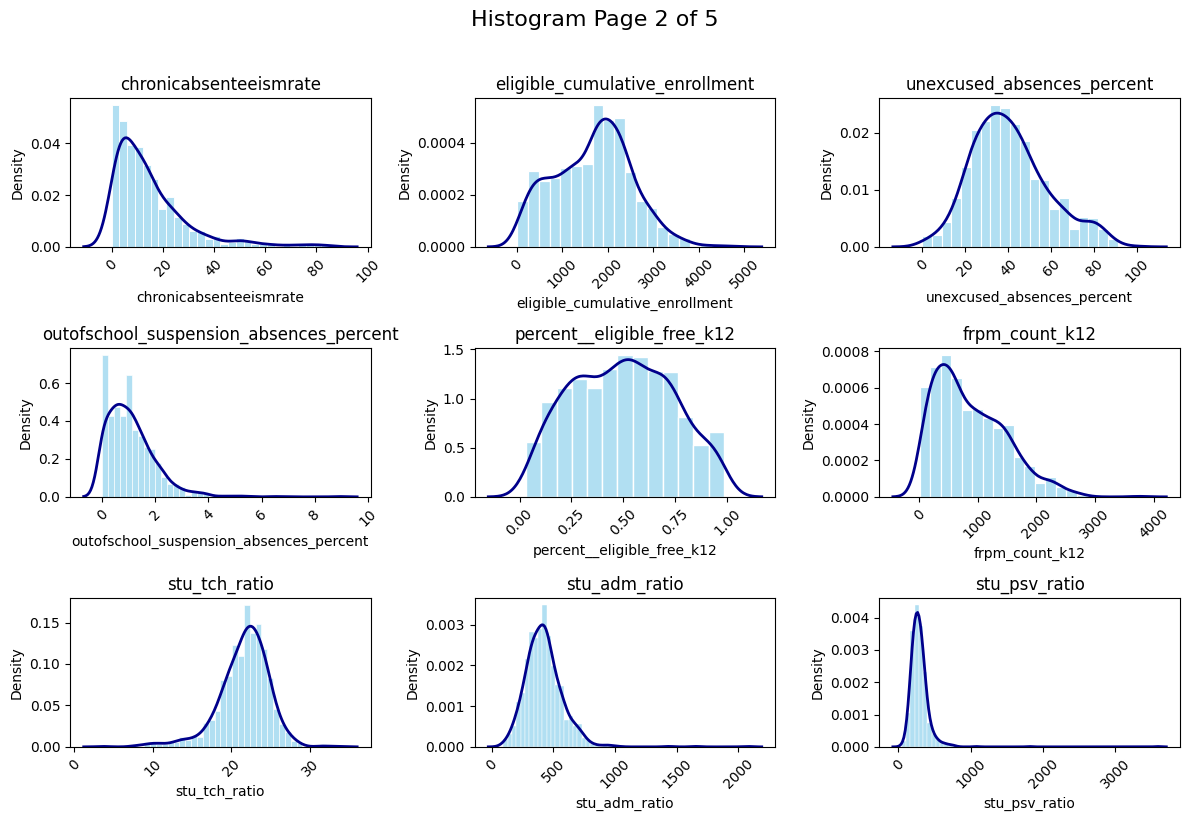

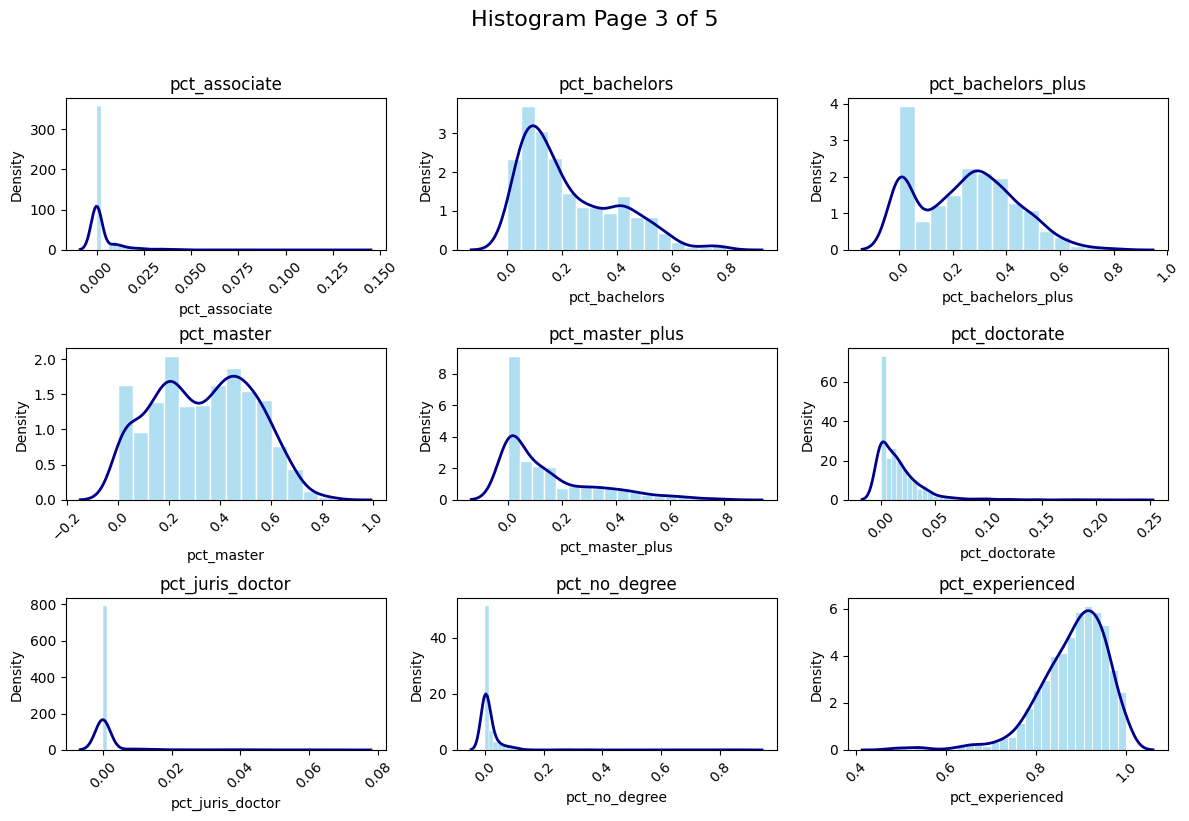

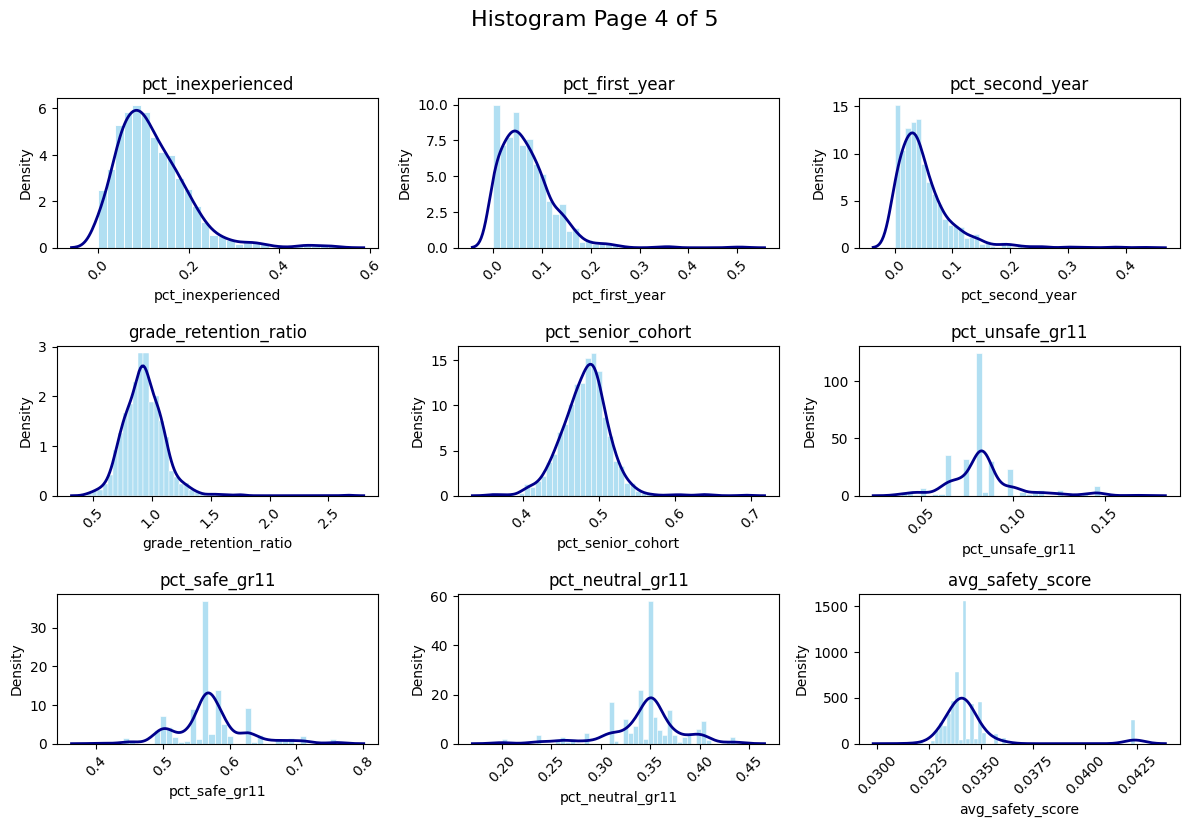

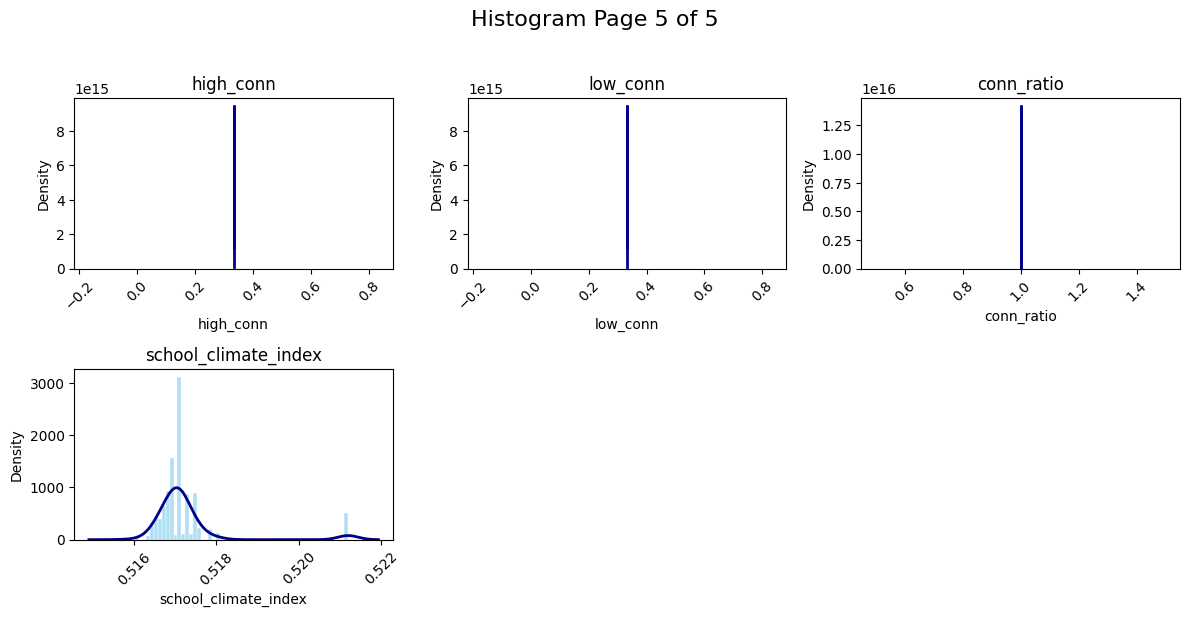

In [22]:
n_cols = 3   # columns per page
n_rows = 3   # rows per page
plots_per_page = n_cols * n_rows
num_pages = math.ceil(len(num_cols) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = start + plots_per_page
    subset = num_cols[start:end]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        ax=axes[i]
        sns.histplot(df[col],
                     ax=ax,
                     bins="auto", 
                     color="skyblue", 
                     alpha=0.65, 
                     stat="density",
                     edgecolor="white",
                     kde=False, 
                     )
        
        # KDE overlay
        sns.kdeplot(df[col], ax=ax, color="darkblue", linewidth=2, warn_singular=False)

        axes[i].set_title(col)
        axes[i].tick_params(axis="x", rotation=45)

    # hide unused subplots (for last page)
    for j in range(len(subset), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"Histogram Page {page + 1} of {num_pages}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


#### Observation

The target variable is `regular_hs_diploma_graduates_rate`. A secondary target variable is `dropout_rate`. 
The target variable is left-skewed showing that most schools have high graduation rates. This also shows there's an imbalance in our target variable. 

Most of these variables are skewed and therefore would require some transformation prior to modeling. 

The following variables do not show any variability and therefore should be removed from the dataset prior to modeling: `high_conn`, `low_conn`, and `conn_ratio`. 

The variables `latitude` and `longitude` are used only for identification and location and would not be helpful in modeling EWS. These columns should be removed prior to modeling. 


### Summary Statistics

In [23]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cdscode,958.0,2.947061e+13,1.389729e+13,1.611190e+12,1.964733e+13,3.066670e+13,3.773569e+13,5.872770e+13
latitude,958.0,3.581028e+01,2.198026e+00,3.256644e+01,3.394705e+01,3.500323e+01,3.773999e+01,4.196415e+01
longitude,958.0,-1.195701e+02,2.026099e+00,-1.242614e+02,-1.215615e+02,-1.190629e+02,-1.179254e+02,-1.145989e+02
cohortstudents,958.0,3.713278e+02,1.956476e+02,1.100000e+01,2.192500e+02,3.815000e+02,5.047500e+02,1.044000e+03
regular_hs_diploma_graduates_rate,958.0,9.201451e+01,6.528421e+00,4.540000e+01,8.950000e+01,9.380000e+01,9.660000e+01,1.000000e+02
met_uccsu_grad_reqs_rate,958.0,5.264144e+01,1.841433e+01,0.000000e+00,4.082500e+01,5.310000e+01,6.520000e+01,1.000000e+02
seal_of_biliteracy_rate,958.0,1.517119e+01,1.237461e+01,0.000000e+00,5.725000e+00,1.370000e+01,2.230000e+01,6.830000e+01
dropout_rate,958.0,4.499791e+00,4.760792e+00,0.000000e+00,1.300000e+00,3.000000e+00,6.300000e+00,3.850000e+01
still_enrolled_rate,958.0,1.513674e+00,2.111686e+00,0.000000e+00,0.000000e+00,8.000000e-01,2.000000e+00,1.670000e+01
chronicabsenteeismrate,958.0,1.475470e+01,1.440405e+01,0.000000e+00,4.725000e+00,1.105000e+01,2.010000e+01,8.500000e+01


### Box Plots

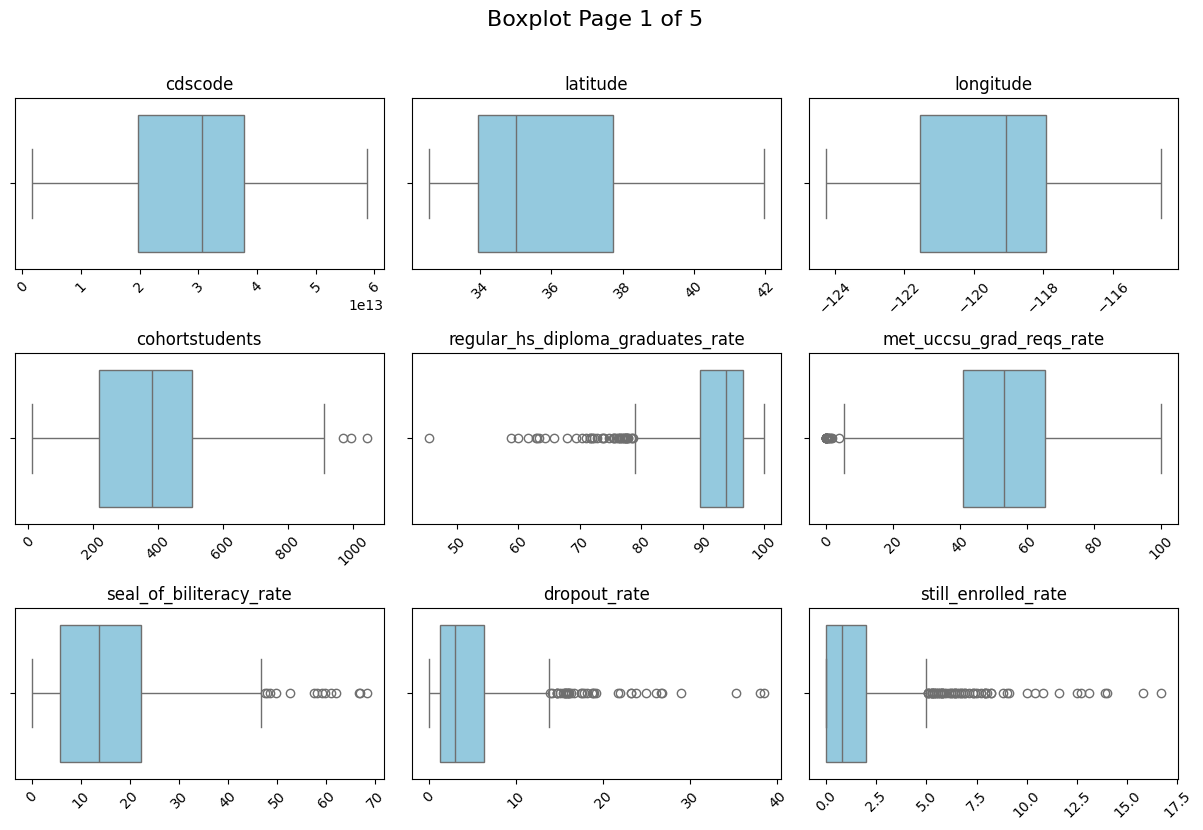

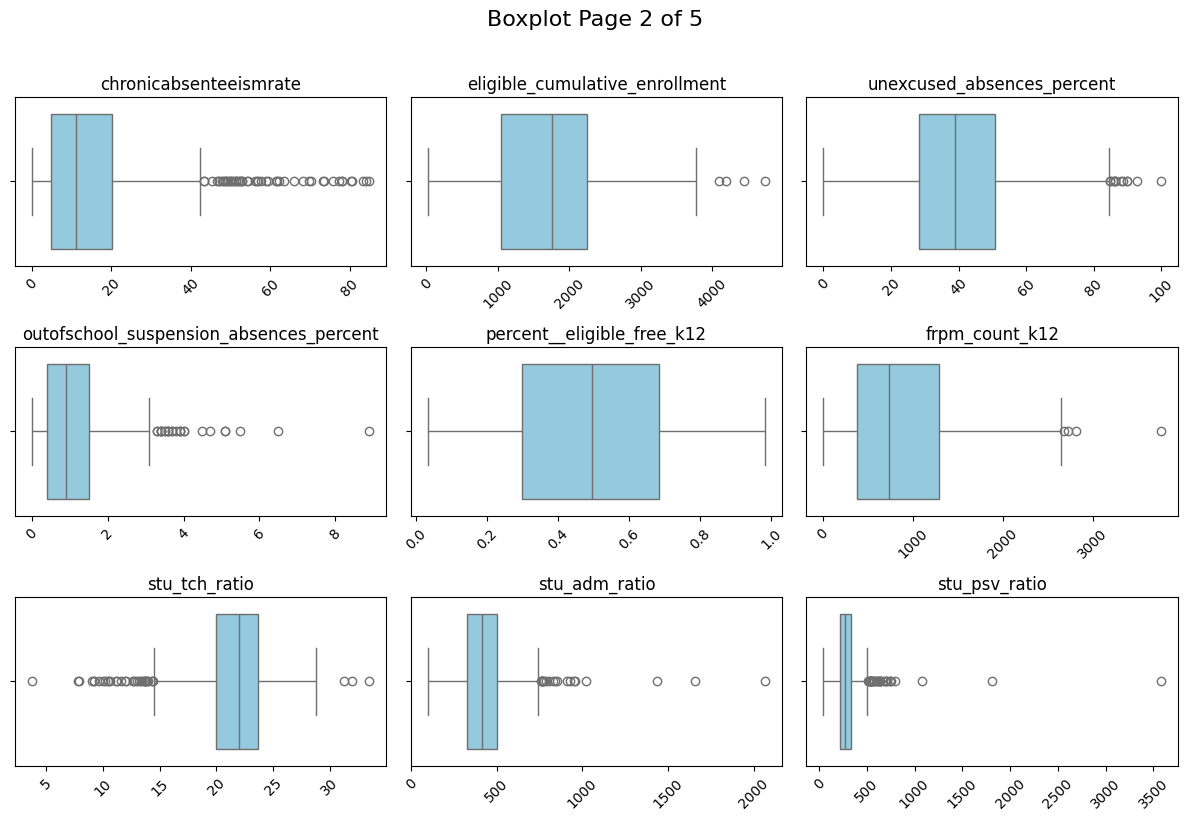

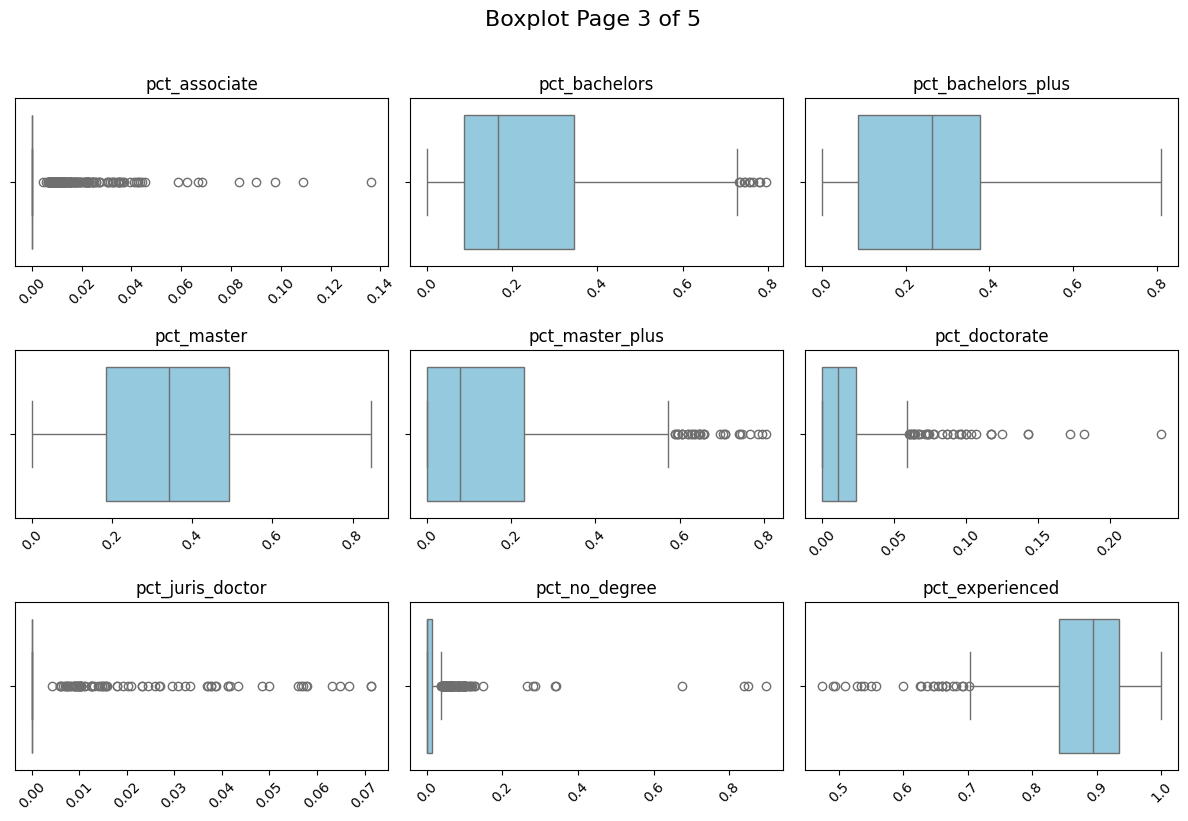

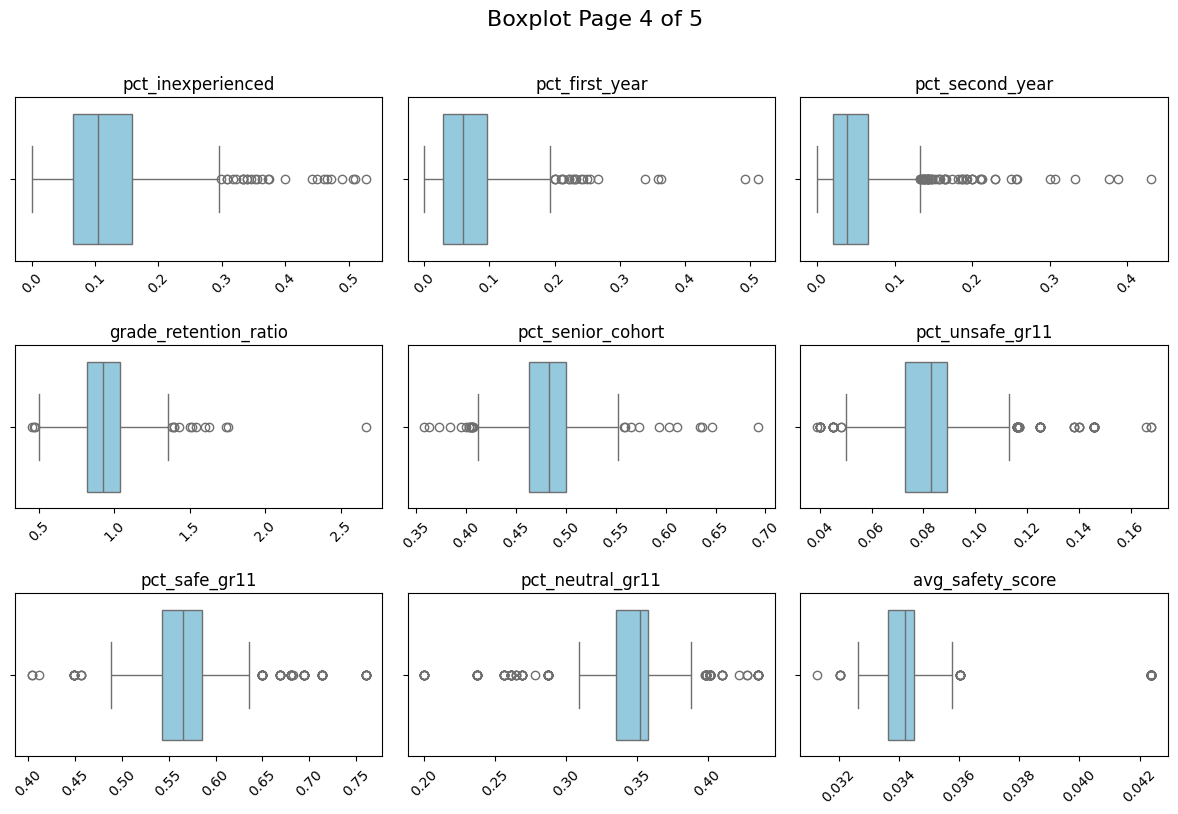

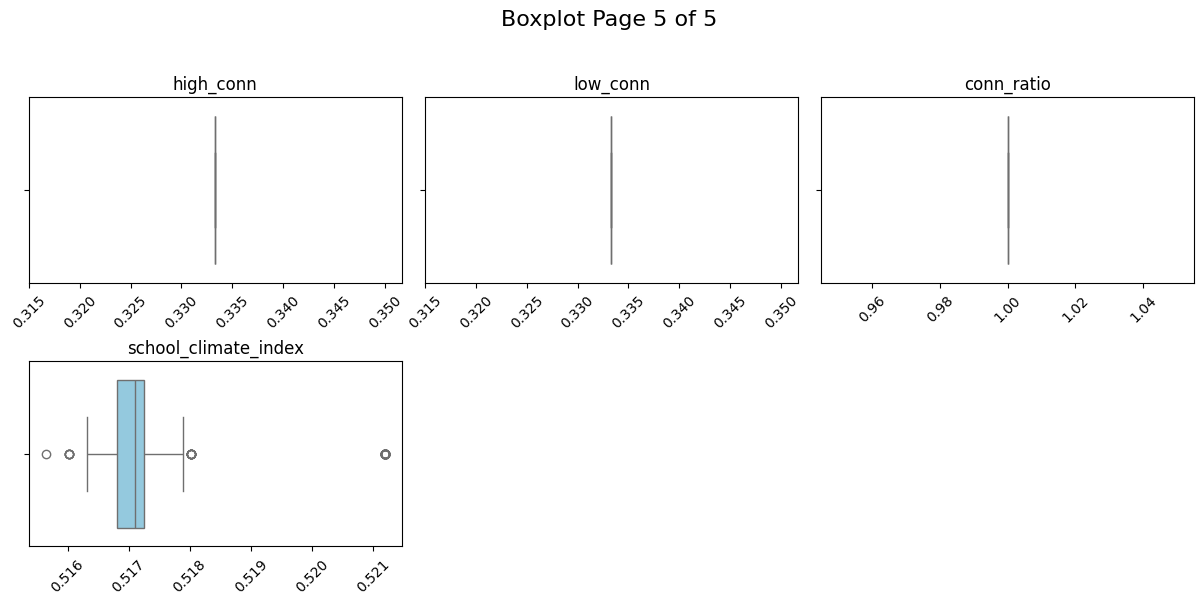

In [24]:
n_cols = 3    # number of columns per page
n_rows = 3    # number of rows per page
plots_per_page = n_cols * n_rows
num_pages = math.ceil(len(num_cols) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = start + plots_per_page
    subset = num_cols[start:end]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis="x", rotation=45)

    # Hide any unused subplots on the last page
    for j in range(len(subset), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"Boxplot Page {page + 1} of {num_pages}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


### Outlier Count Summary

In [25]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers.sort_values(ascending=False)

pct_associate                              200
pct_neutral_gr11                           147
pct_no_degree                              118
pct_safe_gr11                               82
pct_juris_doctor                            81
pct_unsafe_gr11                             80
still_enrolled_rate                         63
avg_safety_score                            57
school_climate_index                        57
pct_second_year                             54
chronicabsenteeismrate                      50
regular_hs_diploma_graduates_rate           45
dropout_rate                                39
pct_doctorate                               39
stu_tch_ratio                               37
stu_psv_ratio                               33
pct_master_plus                             32
pct_inexperienced                           26
pct_experienced                             26
outofschool_suspension_absences_percent     26
pct_senior_cohort                           26
pct_first_yea

In [26]:
outlier_summary = (
    outliers
    .to_frame("Outlier Count")
    .assign(Outlier_Pct=lambda x: (x["Outlier Count"] / len(df) * 100).round(2))
    .sort_values("Outlier Count", ascending=False)
)

outlier_summary.style.background_gradient(cmap="Blues").format({
    "Outlier_Pct": "{:.2f}%"
}).set_caption("Outlier Summary (Count and Percentage)")


,Outlier Count,Outlier_Pct
pct_associate,200,20.88%
pct_neutral_gr11,147,15.34%
pct_no_degree,118,12.32%
pct_safe_gr11,82,8.56%
pct_juris_doctor,81,8.46%
pct_unsafe_gr11,80,8.35%
still_enrolled_rate,63,6.58%
avg_safety_score,57,5.95%
school_climate_index,57,5.95%
pct_second_year,54,5.64%


#### Observation

The outlier summary shows that there are 3 variables that have >10% outliers.

**Education**
- pct_associate: Represents % of staff with associate degrees
- pct_no_degree: Represents % of staff with no degree

**Safety**
- pct_neutral_gr11: Represents the % of 11th graders reporting feeling neither safe or unsafe

These variables show a very heavy right skew based on the histogram and density plots. Due to the shape of these distributions, these outliers do not appear to be data errors. 


## Categorical Features

In [27]:
df_cat = df[cat_cols].copy()
df_cat.head()

,county,virtual,magnet,yearroundyn,multilingual,target_grad_category
0,Alameda,N,N,N,N,Graduated / On Track
1,Alameda,N,N,N,N,Graduated / On Track
2,Alameda,N,N,N,Y,Graduated / On Track
3,Alameda,N,N,N,N,Graduated / On Track
5,Alameda,N,N,N,N,Graduated / On Track


### Cardinality Report

In [28]:
jrep.data_cardinality(df_cat, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 6

[BINARY COLUMNS]
There are 5 binary columns.
 * Columns: ['virtual', 'magnet', 'yearroundyn', 'multilingual', 'target_grad_category']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 0 constant columns.
There are 1 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 5 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 2 unique values
 * magnet: 2 unique values
 * yearroundyn: 2 unique values
 * multilingual: 2 unique values
 * target_grad_category: 2 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


### Frequency and Percentage

In [29]:
for col in cat_cols: 
    print(f"\n {col.upper()}")
    display(
        pd.DataFrame({
            "Count": df_cat[col].value_counts(dropna=False),
            "Percent": (df_cat[col].value_counts(normalize=True) * 100).round(2)
        })
    )


 COUNTY


,Count,Percent
county,,
Los Angeles,200,20.88
San Diego,69,7.20
Orange,64,6.68
Riverside,53,5.53
San Bernardino,50,5.22
Santa Clara,41,4.28
Sacramento,39,4.07
Fresno,32,3.34
Alameda,30,3.13



 VIRTUAL


,Count,Percent
virtual,,
N,605,63.15
C,353,36.85



 MAGNET


,Count,Percent
magnet,,
N,855,89.25
Y,103,10.75



 YEARROUNDYN


,Count,Percent
yearroundyn,,
N,911,95.09
Y,47,4.91



 MULTILINGUAL


,Count,Percent
multilingual,,
N,843,88.0
Y,115,12.0



 TARGET_GRAD_CATEGORY


,Count,Percent
target_grad_category,,
Graduated / On Track,905,94.47
Not Graduated / At Risk,53,5.53


### Count Plots

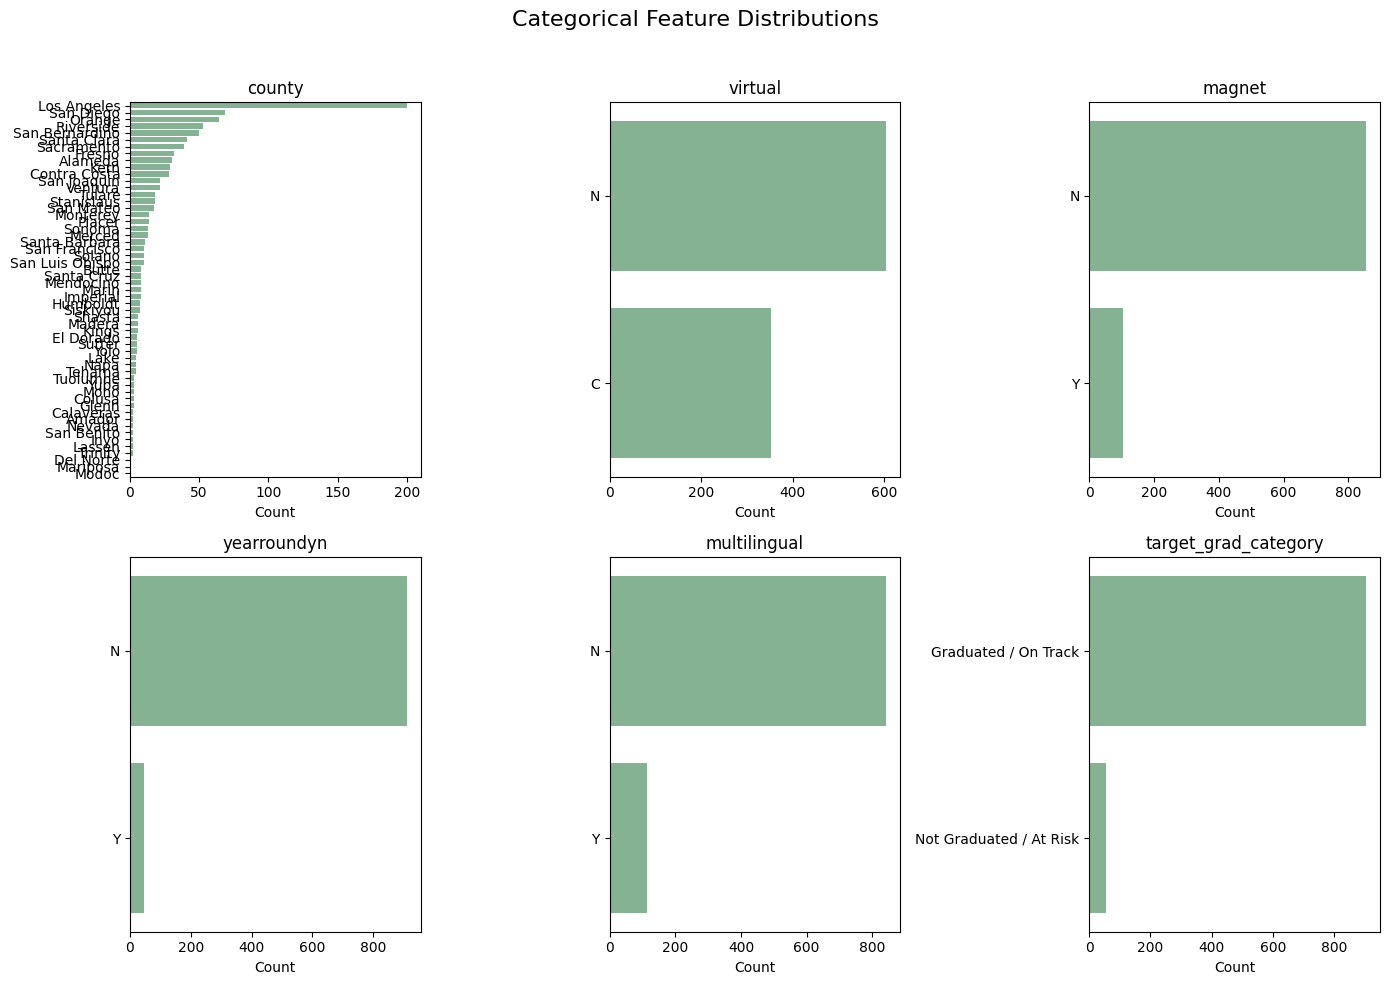

In [30]:
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        y=col,
        data=df_cat,
        order=df_cat[col].value_counts().index,
        color=sns.color_palette("crest")[0],   # <--- fixed
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Categorical Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [31]:
df_cat.describe().T

,count,unique,top,freq
county,958,55,Los Angeles,200
virtual,958,2,N,605
magnet,958,2,N,855
yearroundyn,958,2,N,911
multilingual,958,2,N,843
target_grad_category,958,2,Graduated / On Track,905


#### Observation

The `county` variable is only used for identification and should be removed prior to modeling.   
Most of the schools do not offer `virtual` instruction. Some offer combined but only 3 schools provide full time virtual instruction.   
Majority of the schools identify as non-`magnet` schools with 25 schools having no data. This appears to be a reporting gap instead of missing at random.   
Majority of school do not identify as `multilingual`. There are 26 schools that have no data. This also appears to be a reporting gap instead of missing at random.   
The majority of schools also do not identify as `yearroundyn`.   


### Feature Summary

In [32]:
cat_summary = pd.DataFrame({
    "Unique Categories": df[cat_cols].nunique(),
    "Most Frequent Category": df[cat_cols].mode().iloc[0],
    "Missing Values": df[cat_cols].isna().sum()
})

cat_summary.style.background_gradient(cmap="Greens").set_caption("Categorical Feature Summary")


,Unique Categories,Most Frequent Category,Missing Values
county,55,Los Angeles,0
virtual,2,N,0
magnet,2,N,0
yearroundyn,2,N,0
multilingual,2,N,0
target_grad_category,2,Graduated / On Track,0


/tmp/ipykernel_55573/321096384.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_grad_category', data=df, palette=['skyblue', 'salmon'])


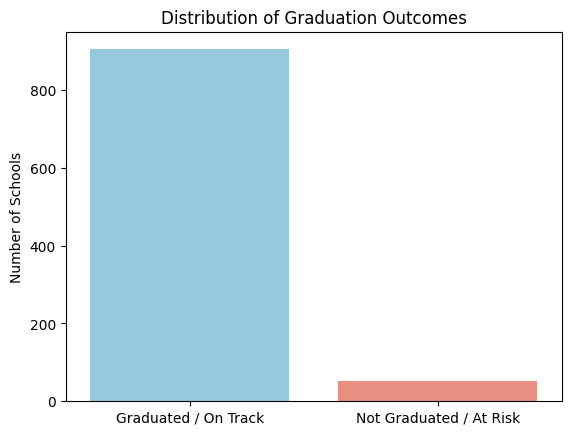

target_grad_category
Graduated / On Track       94.47
Not Graduated / At Risk     5.53
Name: proportion, dtype: float64

In [33]:
sns.countplot(x='target_grad_category', data=df, palette=['skyblue', 'salmon'])
plt.title("Distribution of Graduation Outcomes")
plt.xlabel("")
plt.ylabel("Number of Schools")
plt.show()

df['target_grad_category'].value_counts(normalize=True).mul(100).round(2)


#### Observation

For our target variable, there is a large class imbalance with 94.5% of the results being 'Graduated / On Track'. This will be addressed during modeling with resampling techniques to ensure at-risk schools are properly represented in predictive performance. 

# Bivariate Analysis

## Numerical Features

### Correlation Heatmap

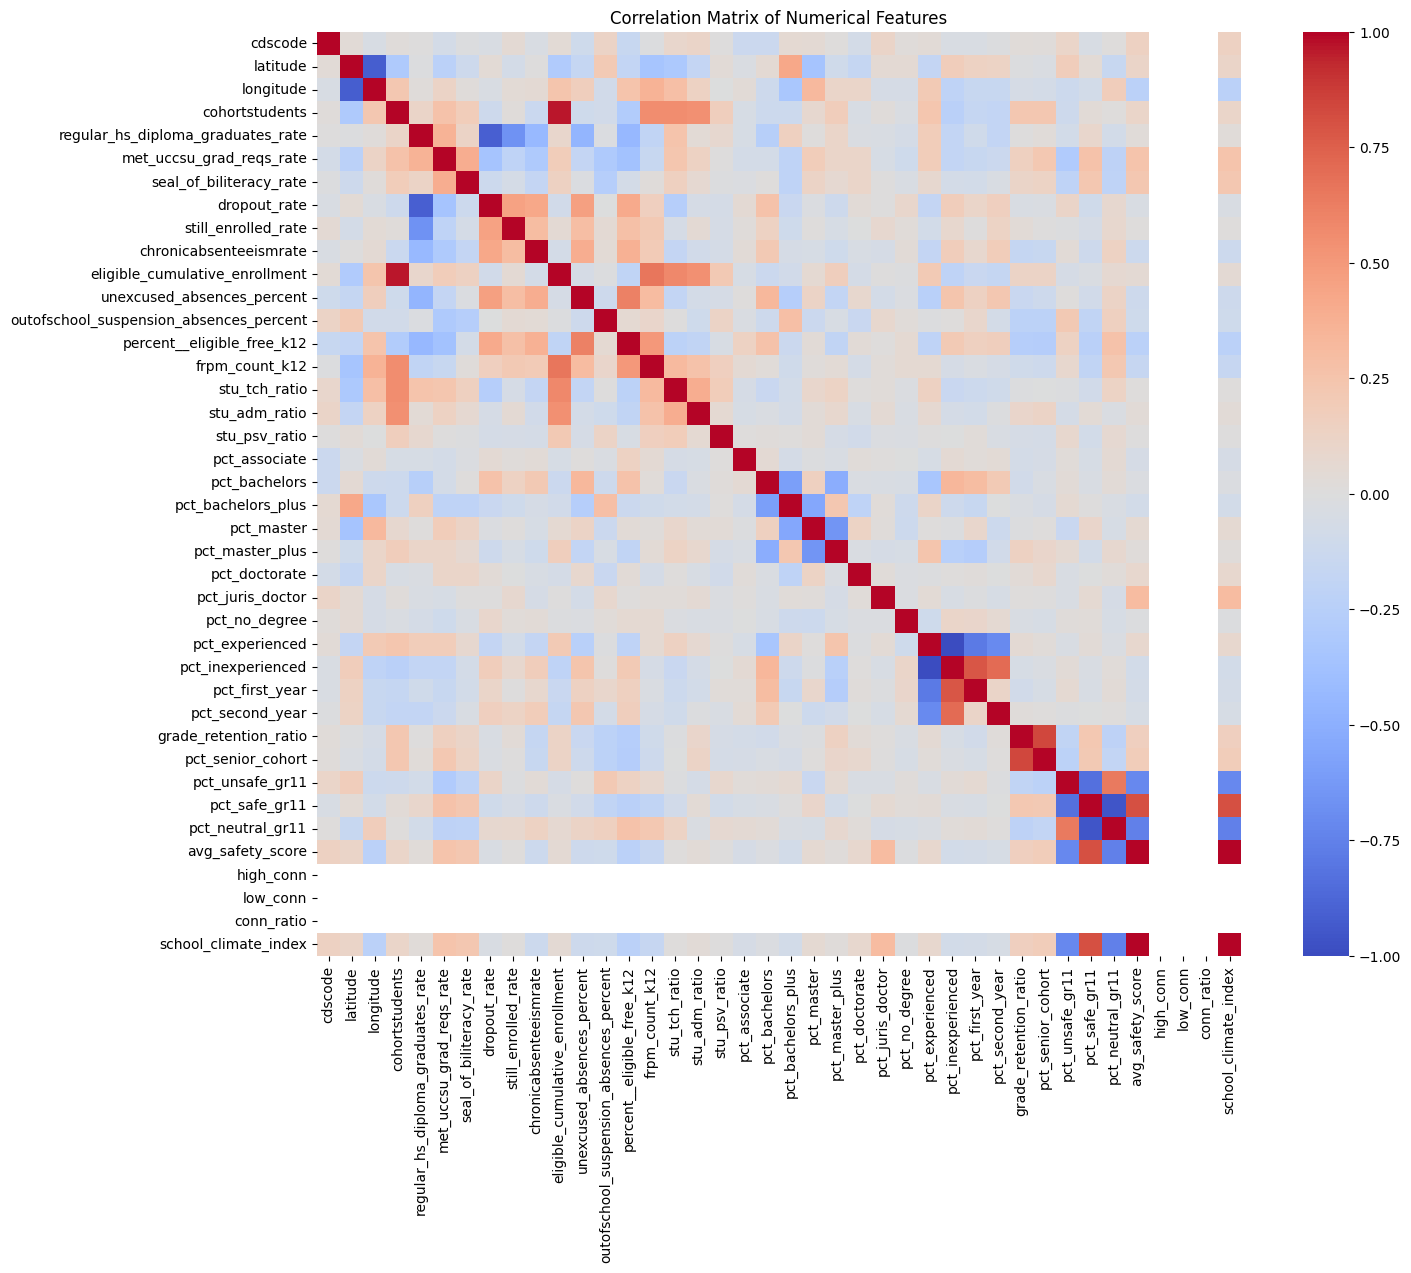

In [34]:
#Calculate correlation between numerical features
corr_matrix = df_num.corr(method= 'pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Strongest Correlation Between Features

In [35]:
# Find all pairs of features and their correlation value
#Only keep upper triangle to avoid duplicate pairs
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_matrix_upper = corr_matrix.where(upper_triangle)

# Stack the matrix to get feature pairs and remove NaN values
corr_pairs = corr_matrix_upper.stack(dropna=True)

#Sort by absoloute correlation value
corr_pairs_sorted = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

#Show top 10 correlated feature pairs
print("Top 10 correlated feature pairs:")
print(corr_pairs_sorted.head(10))


Top 10 correlated feature pairs:
avg_safety_score                   school_climate_index              1.000000
pct_experienced                    pct_inexperienced                -1.000000
cohortstudents                     eligible_cumulative_enrollment    0.964860
pct_safe_gr11                      pct_neutral_gr11                 -0.958540
latitude                           longitude                        -0.916129
regular_hs_diploma_graduates_rate  dropout_rate                     -0.913489
grade_retention_ratio              pct_senior_cohort                 0.843208
pct_unsafe_gr11                    pct_safe_gr11                    -0.834041
pct_safe_gr11                      school_climate_index              0.812434
                                   avg_safety_score                  0.812434
dtype: float64


/tmp/ipykernel_55573/1431607834.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  corr_pairs = corr_matrix_upper.stack(dropna=True)


### Correlations with Graduation Rates

In [36]:
#Correlation with target variable
target_corr = corr_matrix[target].drop(target).sort_values(ascending=False)
print(f"Correlation of features with target variable '{target}':")
print(target_corr)

Correlation of features with target variable 'regular_hs_diploma_graduates_rate':
met_uccsu_grad_reqs_rate                   0.366706
stu_tch_ratio                              0.254204
pct_experienced                            0.183584
pct_bachelors_plus                         0.150677
seal_of_biliteracy_rate                    0.123406
cohortstudents                             0.116345
pct_master_plus                            0.107726
pct_safe_gr11                              0.089723
eligible_cumulative_enrollment             0.086455
stu_psv_ratio                              0.073253
stu_adm_ratio                              0.045436
school_climate_index                       0.029295
avg_safety_score                           0.029295
pct_senior_cohort                          0.024017
longitude                                  0.021763
pct_master                                 0.012945
grade_retention_ratio                      0.006460
cdscode                           

### Bar Chart for Graduation Rate Correlation

/tmp/ipykernel_55573/157264960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos_corr.values,


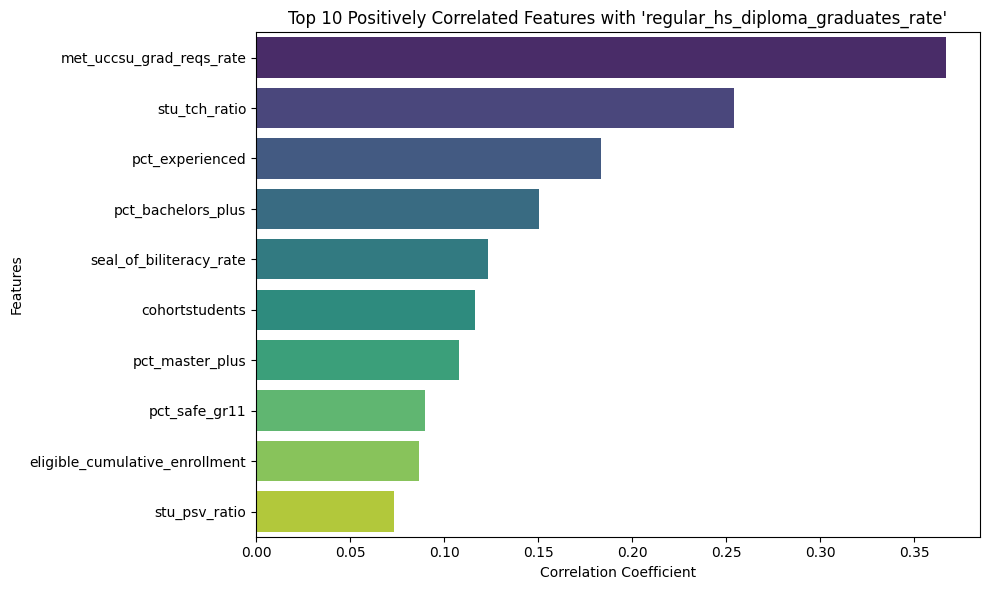

/tmp/ipykernel_55573/157264960.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg_corr.values,


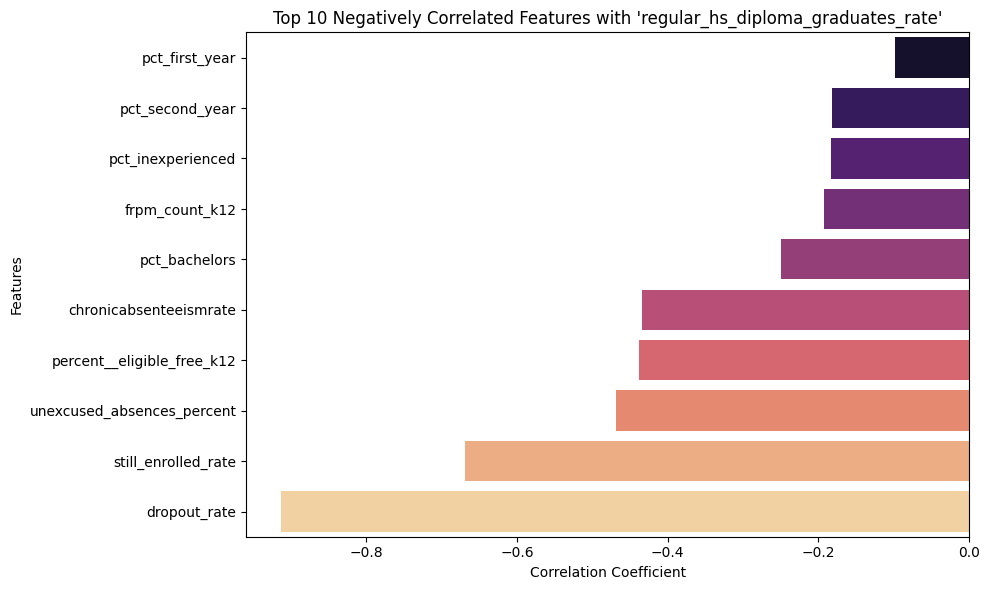

In [37]:
#Create Bar Chart for correlation with target variable
#Top 10 positively correlate features 
top_pos_corr = target_corr.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pos_corr.values, 
            y=top_pos_corr.index, 
            palette="viridis")
plt.title(f"Top 10 Positively Correlated Features with '{target}'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#Top 10 negatively correlate features
top_neg_corr = target_corr[target_corr < 0].tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neg_corr.values, 
            y=top_neg_corr.index, 
            palette="magma")
plt.title(f"Top 10 Negatively Correlated Features with '{target}'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### Scatter plots for Graduation Rate Correlation

Top 6 strongly correlated features with target variable:
['dropout_rate', 'still_enrolled_rate', 'unexcused_absences_percent', 'percent__eligible_free_k12', 'chronicabsenteeismrate', 'met_uccsu_grad_reqs_rate']


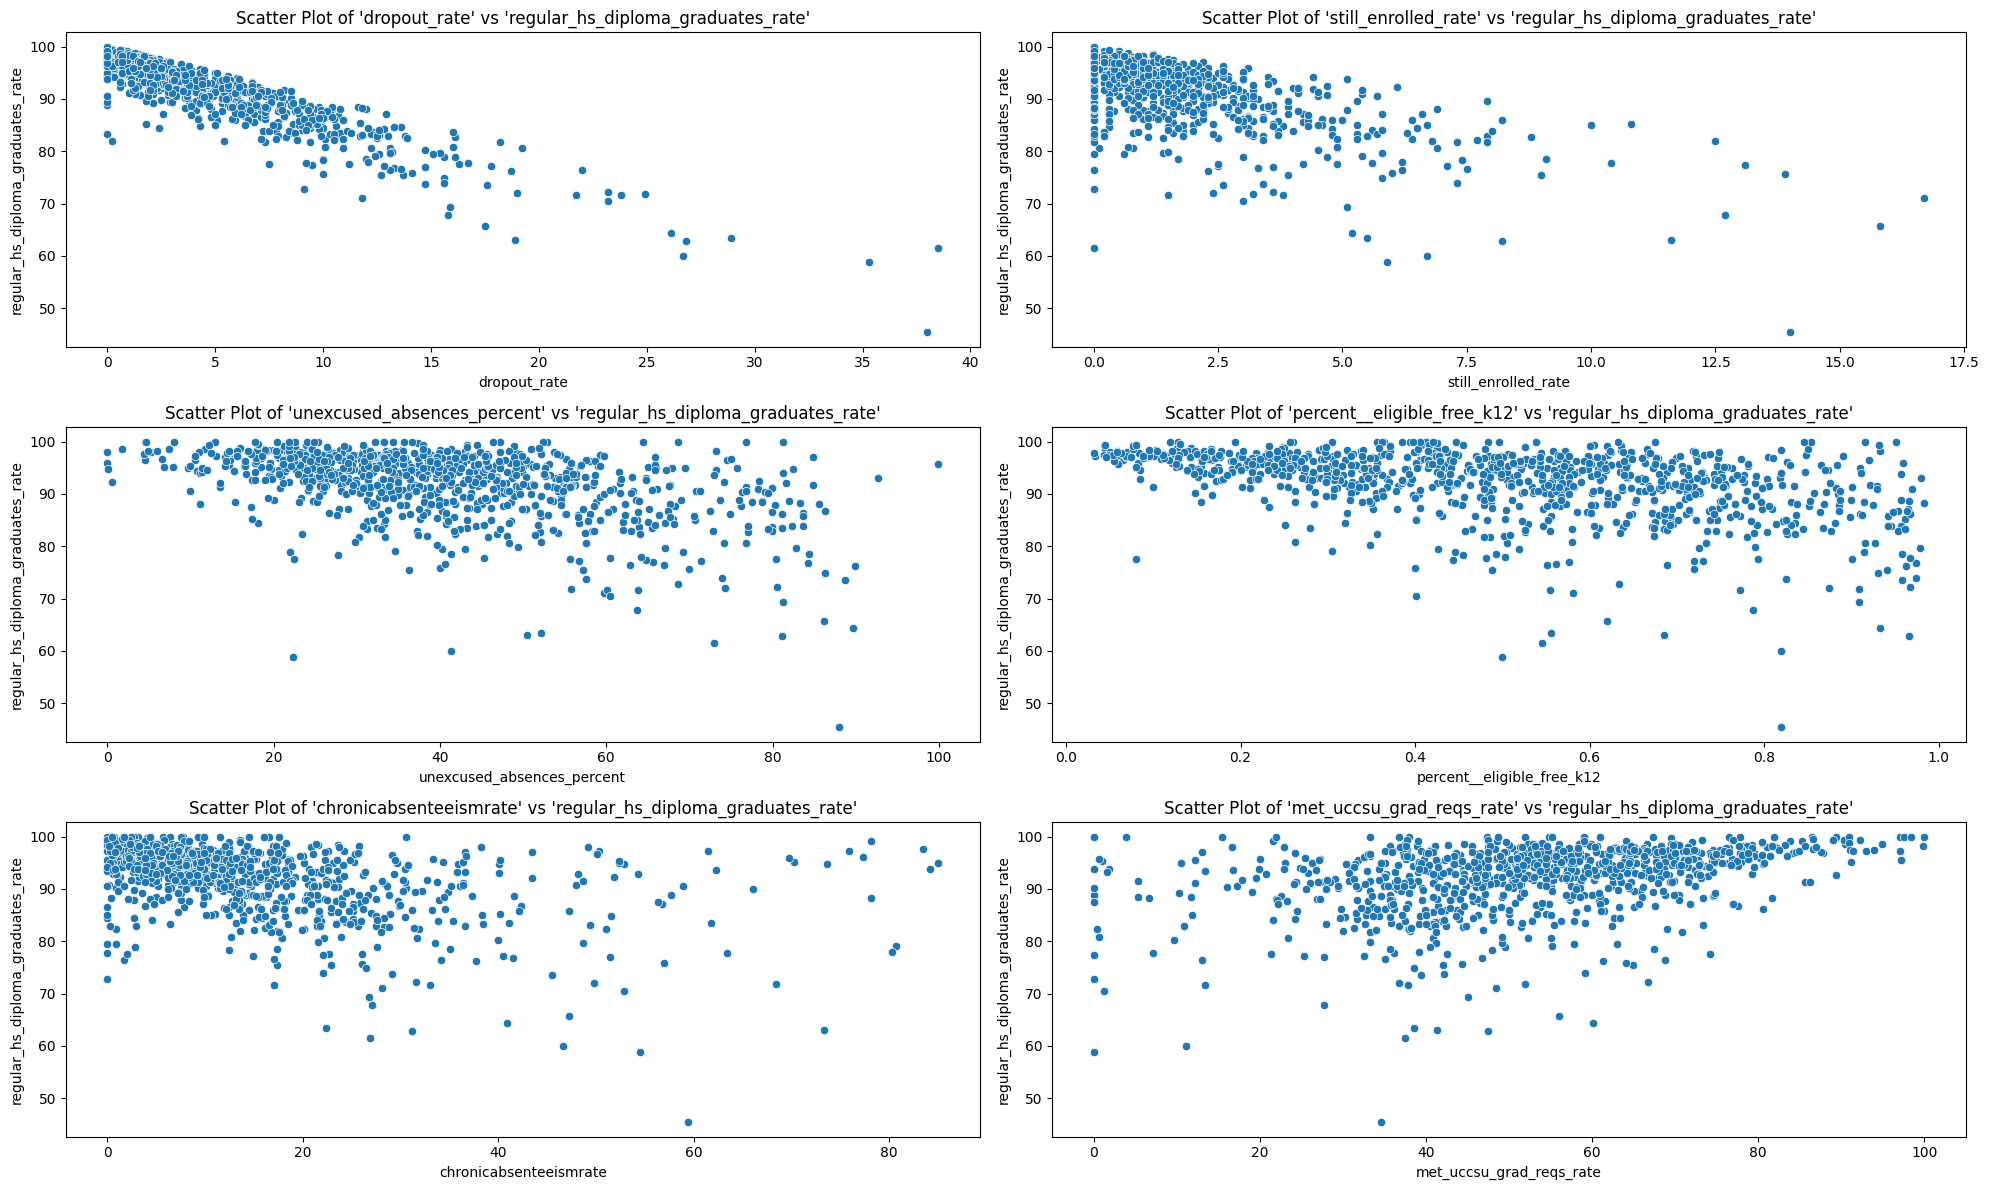

In [38]:
#Scatter plots for top 6 strongly correlated features with target variable
top_6_features = target_corr.abs().sort_values(ascending=False).head(6).index.tolist()
print ("Top 6 strongly correlated features with target variable:")
print(top_6_features)

#Scatter plots
n_cols = 2
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()
for i, feature in enumerate(top_6_features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of '{feature}' vs '{target}'")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target) 
plt.tight_layout()
plt.show()

## Categorical Features

### Categorical variables vs Graduation Rate

In [39]:
# drop county from analysis as it is only used for identification
cat_cols.remove("county")

#Compare graduation rate by categorical features
for cat_col in cat_cols:
   print(f"\nGraduation rate statistics by '{cat_col}':")
   mean_values = df.groupby(cat_col)[target].mean().sort_values(ascending=False)
   print("Mean Graduation Rate:")
   print(mean_values)


Graduation rate statistics by 'virtual':
Mean Graduation Rate:
virtual
C    92.211615
N    91.899504
Name: regular_hs_diploma_graduates_rate, dtype: float64

Graduation rate statistics by 'magnet':
Mean Graduation Rate:
magnet
N    92.224094
Y    90.274757
Name: regular_hs_diploma_graduates_rate, dtype: float64

Graduation rate statistics by 'yearroundyn':
Mean Graduation Rate:
yearroundyn
Y    92.517021
N    91.988584
Name: regular_hs_diploma_graduates_rate, dtype: float64

Graduation rate statistics by 'multilingual':
Mean Graduation Rate:
multilingual
N    92.103440
Y    91.362609
Name: regular_hs_diploma_graduates_rate, dtype: float64

Graduation rate statistics by 'target_grad_category':
Mean Graduation Rate:
target_grad_category
Graduated / On Track       93.114033
Not Graduated / At Risk    73.239623
Name: regular_hs_diploma_graduates_rate, dtype: float64


### Boxplots - Categorical features vs target variable

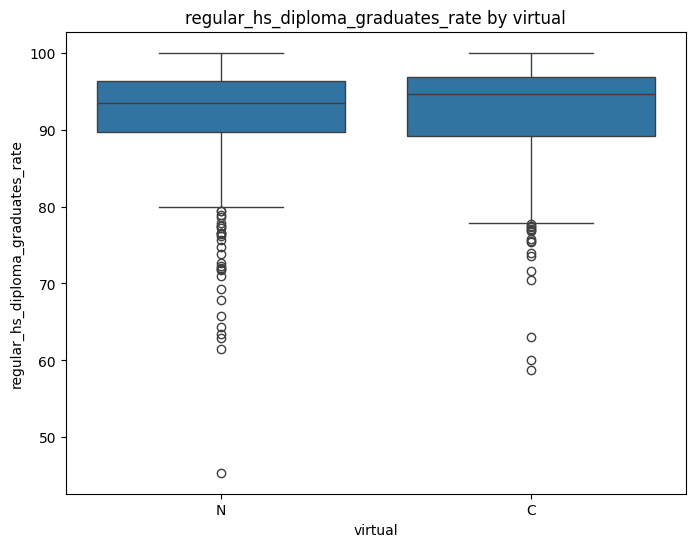

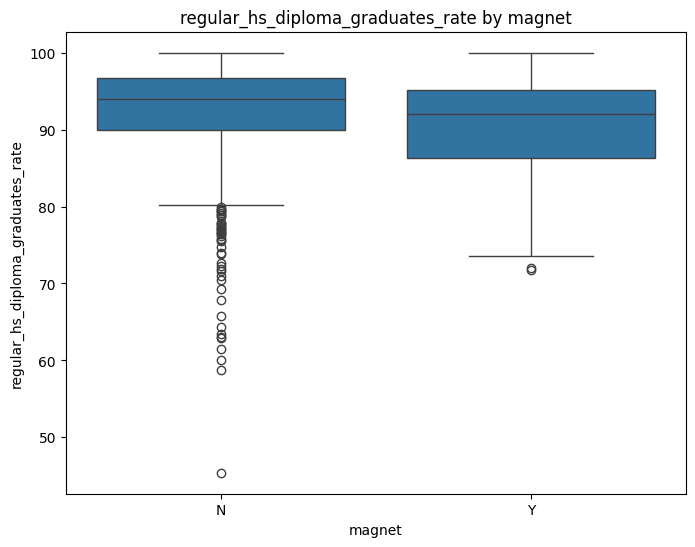

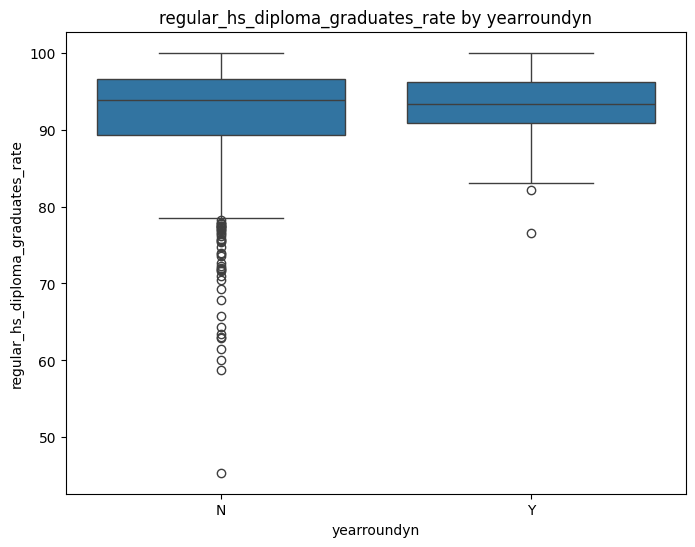

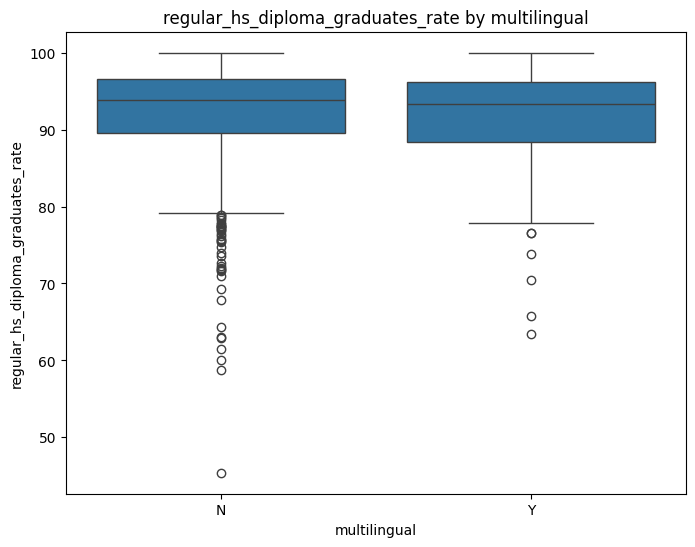

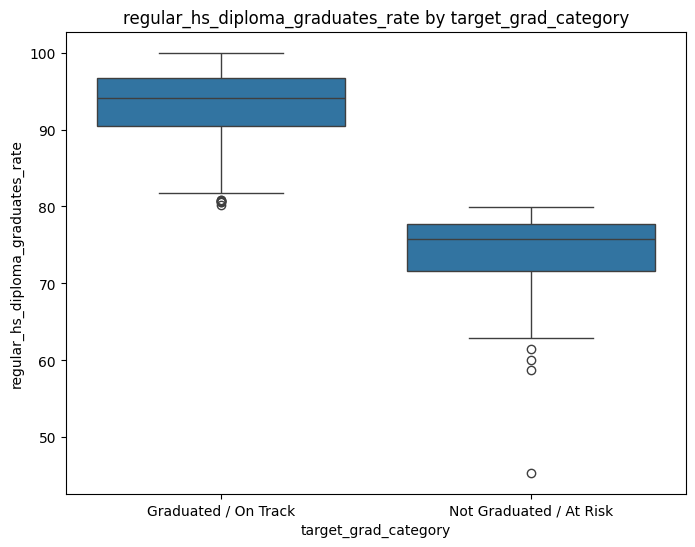

In [40]:
#Boxplots- Categorical features vs target variable
for cat_col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_col, y=target, data=df)
    plt.title(f"{target} by {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel(target)
    plt.show()

# Summary for Bivariate Analysis 
### Key findings based on the bivariate analysis we did:
**1. Relationship Between Features and Multicollinearity**

We created a correlation matrix and obtained the features that were strongly correlated with each other.  This high correlation may cause multicollinearity issues and will need to be addressed before modeling. Those features were:

* 'avg_safety_score'  and 'school_climate_index': These two had a score of 1.00, which is a prefect correlation meaning that these could be measuring the same thing. 

* 'pct_experienced' and 'pct_inexperienced': These features had a score of -1.00 which is a perfect inverse meaning they are complementary measures. 

* 'cohortstudents' and 'eligible_cumulative_enrollment': The score for these features was 0.96 which has a high correlation, therefore it is measuring a similar enrollment conept.

* 'regular_hs_diploma_rate' and 'dropout rate': The score was -0.83 which is a strong inverse, as expected for the variables. 

**2. Correlation with Graduation Rate**

Next, we found the correlation of features with graduation rate. We found the features that positively and negatively correlate with Graduation rate. The following are features that showed a positive correlation, meaning they increase as graduation rates increase:

* 'met_uscsu_grad_reqs_rate'(0.38): Students who meet UC/CSU requirements are more likely to graduate
* 'stu_tch_ratio' (0.25): Higher student-teacher ratios correlate with a higher graduation. This is a surprising result and we would need to do further investigation on this. 
* 'pct_experienced' (0.18): More experienced teachers correlate with more graduation rates. 
* 'pct_bachelors_plus' (0.15): T eachers with credentials beyond bachelor's degree correlate with better outcomes
* 'seal_of_biliteracy_rate' (0.15): An academic achivement for high level of profeciency in one or more languages in addition to English.
* 'cohortstudents' (0.14): Larger cohorts tend to have slightly more graduation rates. 

The following are features that showed a negative correlation, meaning as they increase as graduation rates decrease:

* 'dropout_rate' (-0.83): This feature has a very strong negative relationship with graduation rates, which makes sense since they are opposite. 
* 'still_enrolled_rate' (-0.67): Students who did not graduation by the end of their cohort period and are still enrolled. 
* 'chronicabsenteeismrate' (-0.44): Chronic absenteeism has a negative correlation with graduation rate, therefore it is a strong indicator of lower graduation.
* 'unexcused_absences_percent' (-0.39): Unexcused absences also is a strong indicator of lower graduation rate as it leads students to disengage in school.
* 'percent_eligible_free_k12' (-0.39): This a socioeconomic inidcator and it has a negative correlation as well, thus this disadvantage has an impact on graduation rates. 
* 'pct_bachelors' (-0.25): Teachers with only a bachelor's degree correlates with lower graduation. 
* 'pct_inexperienced' (-0.18): Inexperienced teachers correlate negatively with graduation. 

**3.The Impacts of Categorical Variables**

Lastly, we examined the relationships categorical variables had with different school types. These were our findings: 
Virtual School:
* Fully virtual schools had a graduation rate of 100%
* Classroom based schools had a graduation rate of 92.3% 
* Non-virtual schools had a graduation rate of 91.6% 
Although there was a perfect score for virtual schools, it is important to keep in mind that there was a very small sample size.

Magnet Schools:
* Non-magnet schools had a graduation rate of 92.0%, while magnet schools had a graduation rate of 90.4%. There was a minimal difference between the two of only 1.6%. 

Year-round Schools:
* Year-round schools had a graduation rate of 92.2%, while traditional schools had a graduation rate of 91.9%. Again, the difference here is really small of only 0.3%. 

Multilingual Programs:
* For schools that were not multilingual the graduation rate was 91.9%, while the schools that were multilingual had a rate of 91.5%. There was a very small difference again of only 0.4%. 

Overall there is small difference in graduation rates based on school type and therefore they have minimal impact compared to the other factors. 


**4. Conclusion**

After conducting the bivariate analysis there were features that are stronger indicators for graduation rates compared to others. Attendance and engagement metrics have a stronger correlation with graduation rate, and followed by socioconomic factors. The features that had little impact was how the school was structures. There was also an unexpected positive correlation between graduation rates and the ratio between students and teachers which will need to be investigated more. 

# Create datasets for modeling

## Features to drop
- `dropout_rate` - secondary target, strong correlation with target variable
- `avg_safety_score` - perfect correlation with `school_climate_index`
- `pct_inexperienced` - correlated with `pct_experienced`
- `eligible_cumulative_enrollment` - correlated with `cohortstudents`
- `pct_unsafe_gr11`, `pct_safe_gr11`, `pct_neutral_gr11` - missing >16% data, correlation with `avg_safety_score`
- `pct_first_year` - correlated with `pct_experienced`
- `high_conn`, `low_conn`, `conn_ratio` - low variance and therefore no predictive power

All categorical variables have low variance and therefore have low predictive power. These will also be dropped from the dataset. 
- `virtual`
- `magnet`
- `yearroundyn`
- `multilingual`

Features that are only used for identification will be dropped.
- `county`
- `cdscode`
- `latitude`
- `longitude`

## Dataset with safety climate imputed

In [41]:
# columns to drop
features_to_drop = [
    'dropout_rate',
    'avg_safety_score',
    'pct_inexperienced', 
    'eligible_cumulative_enrollment', 
    'pct_unsafe_gr11', 
    'pct_safe_gr11', 
    'pct_neutral_gr11', 
    'pct_first_year',
    'high_conn', 
    'low_conn', 
    'conn_ratio',
    'virtual',
    'magnet', 
    'yearroundyn', 
    'multilingual', 
    'county', 
    'cdscode', 
    'latitude', 
    'longitude'
]


In [42]:
# create copy before dropping columns
df_raw = df.copy()

print(f"Shape before dropping features: {df.shape}")
df = df.drop(columns=features_to_drop)
print(f"Shape after dropping features: {df.shape}")

Shape before dropping features: (958, 46)
Shape after dropping features: (958, 27)


### Imputation of missing data

For missing data in each feature, median imputation will be performed. 

In [43]:
df.columns.to_list()

['cohortstudents',
 'regular_hs_diploma_graduates_rate',
 'met_uccsu_grad_reqs_rate',
 'seal_of_biliteracy_rate',
 'still_enrolled_rate',
 'chronicabsenteeismrate',
 'unexcused_absences_percent',
 'outofschool_suspension_absences_percent',
 'percent__eligible_free_k12',
 'frpm_count_k12',
 'stu_tch_ratio',
 'stu_adm_ratio',
 'stu_psv_ratio',
 'pct_associate',
 'pct_bachelors',
 'pct_bachelors_plus',
 'pct_master',
 'pct_master_plus',
 'pct_doctorate',
 'pct_juris_doctor',
 'pct_no_degree',
 'pct_experienced',
 'pct_second_year',
 'grade_retention_ratio',
 'pct_senior_cohort',
 'school_climate_index',
 'target_grad_category']

In [44]:
# check missing and value being imputed
missing_before = df.isnull().sum()
imputed_medians = df.median(numeric_only=True)

for col, missing_count in missing_before.items():
    if missing_count > 0:
        print(f"{col}: {missing_count} values imputed with median ({imputed_medians[col]:.2f})")

stu_tch_ratio: 14 values imputed with median (22.00)
stu_adm_ratio: 58 values imputed with median (414.00)
stu_psv_ratio: 62 values imputed with median (274.70)
pct_associate: 14 values imputed with median (0.00)
pct_bachelors: 14 values imputed with median (0.17)
pct_bachelors_plus: 14 values imputed with median (0.26)
pct_master: 14 values imputed with median (0.34)
pct_master_plus: 14 values imputed with median (0.08)
pct_doctorate: 14 values imputed with median (0.01)
pct_juris_doctor: 14 values imputed with median (0.00)
pct_no_degree: 14 values imputed with median (0.00)
pct_experienced: 14 values imputed with median (0.89)
pct_second_year: 14 values imputed with median (0.04)
grade_retention_ratio: 2 values imputed with median (0.92)
school_climate_index: 106 values imputed with median (0.52)


In [45]:
# impute missing values
df = df.fillna(df.median(numeric_only=True))

In [46]:
jrep.data_info(df, show_columns=True)


SHAPE:
There are 958 rows and 27 columns (0.27 MB).

DUPLICATES:
There are 0 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 1
 * float: 26
There are 26 numerical (int/float/bool) variables.
 * Columns: ['cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_second_year', 'grade_retention_ratio', 'pct_senior_cohort', 'school_climate_index']
There are 1 categorical (nominal/ordinal) variables.
 * Columns: ['target_grad_category']

DATETIME COLUMNS:
There are 0 datetime variables and 0 possible datetime variables.

OTHER COLUMN/VA

In [47]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 27

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['target_grad_category']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 0 constant columns.
There are 0 near-constant columns with >= 95% of values being the same.

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 1 low cardinality columns with <= 10 unique values.
Columns:
 * target_grad_category: 2 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


In [48]:
jrep.data_quality(df, show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 25866
 * Memory usage: 0.27 MB
 * Rows: 958
 * Columns: 27

MISSING DATA:
 * Total entries: 0 missing (0.0%)

ROWS:
----------
 * Rows missing any: 0
 * Rows missing all: 0

DUPLICATES: 0

COLUMNS:
----------------
Columns missing any: 0

CONSTANT: 0

NEAR CONSTANT: 0
	(95% of values are the same)

MIXED DATATYPES: 0

HIGH CARDINALITY: 0
	(60% >= unique values)


### Rename target variables

In [49]:
# rename numerical target variable
df = df.rename(columns = {target: 'graduation_rate'})

# rename categorical target variable
df = df.rename(columns = {'target_grad_category': 'high_grad_rate'})

In [50]:
df.to_pickle( data_folder / "modeling_dataset.pkl")

## Dataset: Drop safety, keep all counties

In [51]:
df.shape
df_all_counties = df.drop(columns=["school_climate_index"])
df_all_counties.shape

df.to_pickle( data_folder / "modeling_all_counties.pkl")

In [52]:
df_all_counties.head()


,cohortstudents,graduation_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,still_enrolled_rate,chronicabsenteeismrate,unexcused_absences_percent,outofschool_suspension_absences_percent,percent__eligible_free_k12,frpm_count_k12,...,pct_master,pct_master_plus,pct_doctorate,pct_juris_doctor,pct_no_degree,pct_experienced,pct_second_year,grade_retention_ratio,pct_senior_cohort,high_grad_rate
0,394.0,92.4,73.9,22.8,1.0,12.7,23.5,0.5,0.172013,327.0,...,0.126316,0.347368,0.021053,0.0,0.063158,0.863158,0.031579,1.058568,0.498894,Graduated / On Track
1,284.0,95.1,67.8,21.5,0.0,70.3,46.2,0.4,0.174389,307.0,...,0.342236,0.079646,0.011065,0.0,0.000000,0.894523,0.038462,0.996721,0.501264,Graduated / On Track
2,861.0,90.5,62.3,12.1,0.8,5.2,24.1,0.0,0.262259,935.0,...,0.360169,0.046610,0.016949,0.0,0.000000,0.855932,0.050847,1.014907,0.496276,Graduated / On Track
3,672.0,96.4,72.8,25.0,0.0,3.5,28.0,0.9,0.166358,491.0,...,0.161074,0.315436,0.020134,0.0,0.000000,0.912752,0.033557,0.829876,0.470174,Graduated / On Track
5,40.0,95.0,76.3,0.0,0.0,29.6,67.9,0.0,0.551136,102.0,...,0.333333,0.166667,0.000000,0.0,0.000000,1.000000,0.000000,1.170732,0.545455,Graduated / On Track


## Dataset: Drop Counties with Unreported Safety 

In [53]:
counties_to_remove = ['Fresno', 'Madera', 'San Bernardino', 'Santa Clara', 'Sierra', 'Sutter', 'Tulare']
# remove counties
df_no_counties = df_raw[~df_raw['county'].isin(counties_to_remove)].copy()

# drop features 
df_no_counties = df_no_counties.drop(columns=features_to_drop)
df_no_counties.shape

(806, 27)

### Imputation of missing data

In [54]:
# check missing and value being imputed
missing_before = df_no_counties.isnull().sum()
imputed_medians = df_no_counties.median(numeric_only=True)

for col, missing_count in missing_before.items():
    if missing_count > 0:
        print(f"{col}: {missing_count} values imputed with median ({imputed_medians[col]:.2f})")

stu_tch_ratio: 14 values imputed with median (22.00)
stu_adm_ratio: 52 values imputed with median (416.50)
stu_psv_ratio: 59 values imputed with median (268.00)
pct_associate: 14 values imputed with median (0.00)
pct_bachelors: 14 values imputed with median (0.17)
pct_bachelors_plus: 14 values imputed with median (0.26)
pct_master: 14 values imputed with median (0.33)
pct_master_plus: 14 values imputed with median (0.09)
pct_doctorate: 14 values imputed with median (0.01)
pct_juris_doctor: 14 values imputed with median (0.00)
pct_no_degree: 14 values imputed with median (0.00)
pct_experienced: 14 values imputed with median (0.89)
pct_second_year: 14 values imputed with median (0.04)
grade_retention_ratio: 2 values imputed with median (0.93)


In [55]:
# impute missing values
df_no_counties = df_no_counties.fillna(df.median(numeric_only=True))

In [56]:
jrep.data_info(df_no_counties, show_columns=True)


SHAPE:
There are 806 rows and 27 columns (0.23 MB).

DUPLICATES:
There are 0 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 1
 * float: 26
There are 26 numerical (int/float/bool) variables.
 * Columns: ['cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_second_year', 'grade_retention_ratio', 'pct_senior_cohort', 'school_climate_index']
There are 1 categorical (nominal/ordinal) variables.
 * Columns: ['target_grad_category']

DATETIME COLUMNS:
There are 0 datetime variables and 0 possible datetime variables.

OTHER COLUMN/VA

### Rename target variables

In [57]:
# rename numerical target variable
df_no_counties = df_no_counties.rename(columns = {target: 'graduation_rate'})

# rename categorical target variable
df_no_counties = df_no_counties.rename(columns = {'target_grad_category': 'high_grad_rate'})

In [58]:
# save dataset
df_no_counties.to_pickle( data_folder / "modeling_safety_dataset.pkl")